In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as pl

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


> **MILESTONE 1:DATA LOADING**

In [2]:
#reading all the files using pandas
training = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv")
testing = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv")
sample= pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv")
main = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv")

In [3]:
#visualisation of data 
training.head()


,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


In [4]:
testing.head()

,movieid,reviewerName,isTopCritic,reviewText
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...
1,terminator_katniss_everdeen_glimmer,Brian Chaney,False,Philip Noyce's direction is elegant and unforc...
2,james_bond_labyrinth_gollum,Danielle Parker,False,It wouldn't do to say what path Maria ultimate...
3,v_quest_han_solo_wondrous,Brittany Lane,False,Pig is not exactly the arthouse John Wick that...
4,enigma_hulk_surreal_starlight,Justin Willis,False,An imaginative no-budget musical of sorts abou...


In [5]:
main.head()

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN


In [6]:
sample.head()
sample.shape

(55315, 2)

In [7]:
#finding the no of entries in the csv file
print(training.shape)
print(testing.shape)
print(sample.shape)
print(main.shape)
#gathering information of all csv files 
training.info()
testing.info()
sample.info()
main.info()

(162758, 5)
(55315, 4)
(55315, 2)
(143258, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  object
 1   reviewerName        162758 non-null  object
 2   isFrequentReviewer  162758 non-null  bool  
 3   reviewText          156311 non-null  object
 4   sentiment           162758 non-null  object
dtypes: bool(1), object(4)
memory usage: 5.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55315 entries, 0 to 55314
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movieid       55315 non-null  object
 1   reviewerName  55315 non-null  object
 2   isTopCritic   55315 non-null  bool  
 3   reviewText    52805 non-null  object
dtypes: bool(1), object(3)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
Rang

movieid                      0
title                        0
audienceScore            70010
rating                  129267
ratingContents          129267
releaseDateTheaters     112485
releaseDateStreaming     63838
runtimeMinutes           13827
genre                    11083
originalLanguage         13858
director                     0
boxOffice               128515
distributor             120253
soundType               127341
dtype: int64


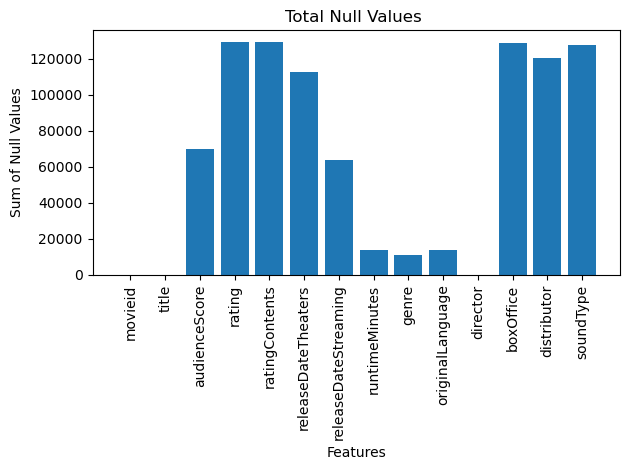

In [8]:
null_data = main.isnull().sum()
# Print the columns with null values
print(null_data)
pl.bar(null_data.index, null_data.values)
pl.xlabel('Features')
pl.ylabel('Sum of Null Values')
pl.title('Total Null Values ')
pl.xticks(rotation='vertical') #rotates the x-axis labels vertically for better readability
pl.tight_layout() #rotates the x-axis labels vertically for better readability
pl.show()

***In the dataset, movie_id is given for all data . Also, I have found that soundType,boxoffice,distributor,releaseDateTheaters,rating,ratingContents etc columns have very less non-null values.*** *Therefore, I prefer not to merge the main and training file*

In [9]:
#sentiment analysis in the data
print(sample['sentiment'].value_counts())
print(training['sentiment'].value_counts())

NEGATIVE    55315
Name: sentiment, dtype: int64
POSITIVE    108761
NEGATIVE     53997
Name: sentiment, dtype: int64


> **DATA PREPROCESSING**

In [10]:
# Drop rows with null values in 'reviewText' column for the training dataset
training = training.dropna(subset=['reviewText']) #remove rows with missing values in the 'reviewText' column

In [11]:
# from sklearn.model_selection import train_test_split
# @Separate the input features (X) and the target variable (y) from the 'traininG
# X = training.drop('sentiment', axis=1) 
# y = training['sentiment'] 
# # # Split the dataset into training and validation sets
# X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.2,random_state=42)
# print((y_valid.value_counts())/len(y_valid)) #to be calculating the distribution of sentiment classes in the validation set.


In [12]:
# from sklearn.feature_extraction.text import CountVectorizer
# count_vectorizer = CountVectorizer() 
##CountVectorizer is used to convert a collection of text documents to a matrix of token counts
# vectorised_text_train = count_vectorizer.fit_transform(X_train['reviewText'])
## Each row of the matrix represents a document (text), and each column represents a unique word (token)
# print(vectorised_text_train)

> **MILESTONE 2 : BASELINE MODEL**

In [13]:
# from sklearn.dummy import DummyClassifier
# X = training["movieid"]
# X = X.to_numpy() #The .to_numpy() method converts the extracted 'movieid' column to a NumPy array.
# y = training["sentiment"]
# dummy_clf = DummyClassifier(strategy="most_frequent")
# dummy_clf.fit(X,y)

In [14]:
# DummyClassifier(strategy='most_frequent')
# dummy_clf.predict(X)


> **LOGISTIC REGRESSION using cross validation**

In [15]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import cross_val_score
# # Logistic Regression model
# model = LogisticRegression( solver='lbfgs', max_iter=1000, class_weight='balanced')
# model.fit(vectorised_text_train, y_train)
# cross_val_scores = cross_val_score(model,vectorised_text_train , y_train, cv=6)
## 6-fold cross-validation and stores the scores in the cross_val_scores variable.
#vectorised_text_test = count_vectorizer.transform(testing['reviewText'])
# # Use the trained model to make predictions on the test data
# y_pred = model.predict(vectorised_text_test)
# print(accuracy_score(y_valid[0:2000], y_pred[0:2000]))
# print(cross_val_score) #This line prints the array of accuracy scores obtained from the cross-validation.

> **RANDOM FOREST CLASSIFIER**

In [16]:
# from sklearn.ensemble import RandomForestClassifier
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_classifier.fit(vectorised_text_train[:4000], y_train[:4000])
# y_pred = rf_classifier.predict(vectorised_text_test)
# print(accuracy_score(y_valid, y_pred))
# #print(classification_report(y_test, y_pred))

> **TUNE THE HYPERPARAMETERS OF MODEL**

In [17]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer, accuracy_score
# from sklearn.ensemble import RandomForestClassifier

# # Define a reduced parameter grid
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
# }

# # Create a scoring function (accuracy in this case)
# scorer = make_scorer(accuracy_score)

# # Create the GridSearchCV object
# grid_search = GridSearchCV(
#     estimator=RandomForestClassifier(random_state=42),
#     param_grid=param_grid,
#     scoring=scorer,
#     cv=5,
#     verbose=1,
#     n_jobs=-1 
# )

# # Fit the GridSearchCV object to a subset of your training data
# grid_search.fit(vectorised_text_train[:2000], y_train[:2000])

# #  retrieve the best parameters and the corresponding best cross-validated score.
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Score:", best_score)
# best_rf_classifier = grid_search.best_estimator_
# y_pred = best_rf_classifier.predict(vectorised_text_test)



> **MILESTONE 3 :APPLY KNN**

In [18]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=7).fit(vectorised_text_train[:10000], y_train[0:10000])
# y_pred = knn.predict(vectorised_text_test[:10000])
# print(accuracy_score(y_valid[:10000], y_pred[:10000]))

> **APPLY SVM MODEL**

In [19]:
# from sklearn.svm import SVC
# svm = SVC(kernel='rbf', C=10.0).fit(vectorised_text_train[:5000], y_train[:5000])
# y_pred = svm.predict(vectorised_text_test[:5000])
# print(accuracy_score(y_valid[:5000], y_pred[:5000]))

**We can see that count vectoriser doesnt give fair accuracy so I m using Tfidvectorizer**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = training['reviewText'].values.astype('U') 
#.astype('U') is used to ensure that all the values in the NumPy array are interpreted and treated as Unicode strings.
y = training['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf_train = tfidf_vectorizer.fit_transform(X_train)
X_tfidf_test = tfidf_vectorizer.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(solver='lbfgs', max_iter=200)
model.fit(X_tfidf_train, y_train)
y_pred = model.predict(X_tfidf_test)
print(accuracy_score(y_test, y_pred))

0.803921568627451


*Applying logistic regression in new  processed data*

In [22]:
x = testing['reviewText'].values.astype('U') 
X_tfidf = tfidf_vectorizer.transform(x)
submissions = pd.DataFrame(model.predict(X_tfidf), columns=['sentiment'])
submissions.index.name = 'id'
submissions.to_csv("submission.csv", encoding='utf-8')
output = pd.read_csv("submission.csv")

As it is giving the best accuracy compared to every other model . It is our main model 

*Applying KNN in new processed data*

In [23]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=7).fit(X_tfidf_train[:10000], y_train[0:10000])
# y_pred = knn.predict(X_tfidf_test[:10000])
#print(accuracy_score(y_test[:10000], y_pred[:10000]))

*Applying SVM in new processed data*

In [24]:
# from sklearn.svm import SVC
# svm = SVC(kernel='rbf',C=10).fit(X_tfidf_train[:10000], y_train[:10000])
# y_pred = svm.predict(X_tfidf_test[:10000])
# print(accuracy_score(y_test[:10000], y_pred[:10000]))

In [25]:
# X1 = testing['reviewText'].values.astype('U')
# X_1_tfidf = tfidf_vectorizer.transform(X1)
# sub = pd.DataFrame(svm.predict(X_1_tfidf), columns=['sentiment'])
# sub.index.name = 'id'
# sub.to_csv("submission.csv", encoding='utf-8')
# output = pd.read_csv("submission.csv")
# print(output)